# PastaStore plot and map utilities<a id="top"></a>

This notebook shows the `PastaStore` functionality for quickly plotting time series, or plotting metadata or models (time series locations) on a map.

## Content
1. [Populate a PastaStore with some data](#Populate-a-PastaStore-with-some-data)
2. [Maps](#Maps)
   1. [Oseries locations](#Oseries-locations)
   2. [All stresses](#All-stresses)
   2. [Model locations](#Model-locations)
   3. [Model statistics](#Model-statistics)
   4. [A single model and its time series](#A-single-model-and-its-time-series)
3. [Plots](#Plots)
   1. [Plot oseries](#Plot-oseries)
   2. [Plot stresses](#Plot-stresses)
   3. [Data availability](#Data-availability)

<hr>

In [1]:
import pandas as pd
import pastas as ps

import pastastore as pst
from pastastore.datasets import example_pastastore

In [2]:
ps.logger.setLevel("ERROR")  # silence Pastas logger for this notebook
pst.show_versions()

Pastastore version : 1.11.0

Python version     : 3.13.7
Pandas version     : 2.3.3
Matplotlib version : 3.10.6
Pastas version     : 1.11.0
PyYAML version     : 6.0.3



## [Populate a PastaStore with some data](#top)

First we create a Connector and a PastaStore object and add some data to it. We're using the example dataset to show the PastaStores plot and map methods.

In [3]:
# get the example pastastore
conn = pst.DictConnector("my_connector")
pstore = example_pastastore(conn)

# remove some example data because it's far away
pstore.del_oseries(["head_nb5", "head_mw"])
pstore.del_stress(["prec_nb5", "evap_nb5", "riv_nb5"])
pstore.del_stress(["prec_mw", "evap_mw", "extraction_2", "extraction_3"])

Deleted 2 oseries from database.
Deleted 3 stress(es) from database.
Deleted 4 stress(es) from database.


<hr>

## [Maps](#top)

PastaStore contains a `maps` attribute that exposes methods for spatially plotting data contained in our database. There are methods for plotting oseries, stress and model locations and there is also a method for plotting a single model and all the time series it contains. The following sections showcase each of these methods. But a map is not a map without some kind of background. The function `PastaStore.maps.add_background_map` allows you to add a background map to any axes object. The method is powered by [contextily](https://contextily.readthedocs.io/en/latest/) and basically allows users to access some of the great functionality provided by that package. Contextily is not a `pastastore` dependency but is obviously recommended, and necessary if you want to access the background maps. For a list of possible background maps, consult `PastaStore.maps._list_contextily_providers()` (see below). We'll be using a few different background map options in the plots below. The default is `OpenStreetMap.Mapnik`.

### [Background maps](#top)

In [4]:
# DataFrame of all contextily map providers
providers_df = pd.DataFrame(pstore.maps._list_contextily_providers()).T
providers_df

,url,max_zoom,html_attribution,attribution,name,bounds,variant,apikey,min_zoom,ext,...,size,time,tilematrixset,TileMatrixSet,tms,detectRetina,apiVersion,subscriptionKey,timeStamp,max_zoom_premium
OpenStreetMap.Mapnik,https://tile.openstreetmap.org/{z}/{x}/{y}.png,19,"&copy; <a href=""https://www.openstreetmap.org/...",(C) OpenStreetMap contributors,OpenStreetMap.Mapnik,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenStreetMap.DE,https://tile.openstreetmap.de/{z}/{x}/{y}.png,18,"&copy; <a href=""https://www.openstreetmap.org/...",(C) OpenStreetMap contributors,OpenStreetMap.DE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenStreetMap.CH,https://tile.osm.ch/switzerland/{z}/{x}/{y}.png,18,"&copy; <a href=""https://www.openstreetmap.org/...",(C) OpenStreetMap contributors,OpenStreetMap.CH,"[[45, 5], [48, 11]]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenStreetMap.France,https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x...,20,"&copy; OpenStreetMap France | &copy; <a href=""...",(C) OpenStreetMap France | (C) OpenStreetMap c...,OpenStreetMap.France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenStreetMap.HOT,https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/...,19,"&copy; <a href=""https://www.openstreetmap.org/...","(C) OpenStreetMap contributors, Tiles style by...",OpenStreetMap.HOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OrdnanceSurvey.Outdoor_27700,https://api.os.uk/maps/raster/v1/zxy/Outdoor_2...,9,Contains OS data &copy Crown copyright and dat...,Contains OS data (C) Crown copyright and datab...,OrdnanceSurvey.Outdoor_27700,"[[0, 0], [700000, 1300000]]",NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
OrdnanceSurvey.Light,https://api.os.uk/maps/raster/v1/zxy/Light_385...,16,Contains OS data &copy Crown copyright and dat...,Contains OS data (C) Crown copyright and datab...,OrdnanceSurvey.Light,"[[49.766807, -9.496386], [61.465189, 3.634745]]",NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
OrdnanceSurvey.Light_27700,https://api.os.uk/maps/raster/v1/zxy/Light_277...,9,Contains OS data &copy Crown copyright and dat...,Contains OS data (C) Crown copyright and datab...,OrdnanceSurvey.Light_27700,"[[0, 0], [700000, 1300000]]",NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
OrdnanceSurvey.Leisure_27700,https://api.os.uk/maps/raster/v1/zxy/Leisure_2...,5,Contains OS data &copy Crown copyright and dat...,Contains OS data (C) Crown copyright and datab...,OrdnanceSurvey.Leisure_27700,"[[0, 0], [700000, 1300000]]",NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


### [Oseries locations](#top)

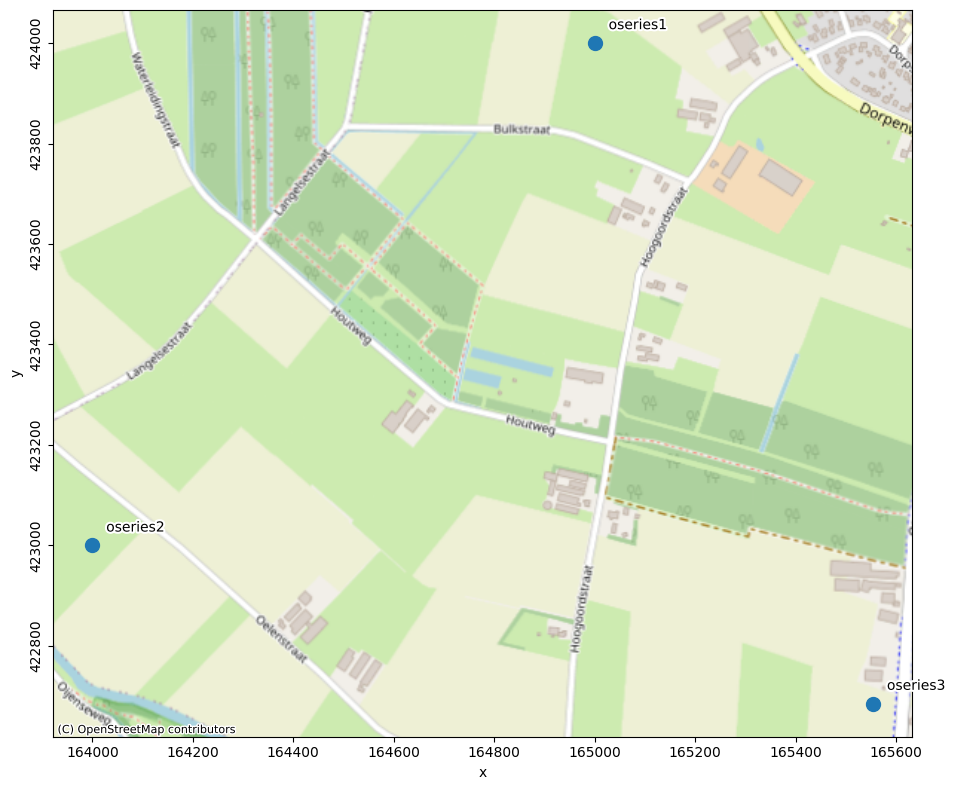

In [5]:
# plot oseries locations
ax1 = pstore.maps.oseries(labels=True, s=100)
pstore.maps.add_background_map(ax1)

### [All stresses](#top)

In [6]:
pstore.stresses

,x,y,kind
name,,,
prec1,165050.000000,424050.000000,prec
prec2,164010.000000,423000.000000,prec
evap1,164500.000000,424000.000000,evap
evap2,164000.000000,423030.000000,evap
well1,164691.000000,423579.000000,well
pressure_mw,123715.757915,397547.780543,pressure
extraction_1,81985.384615,380070.307692,well
extraction_4,87111.000000,374334.000000,well


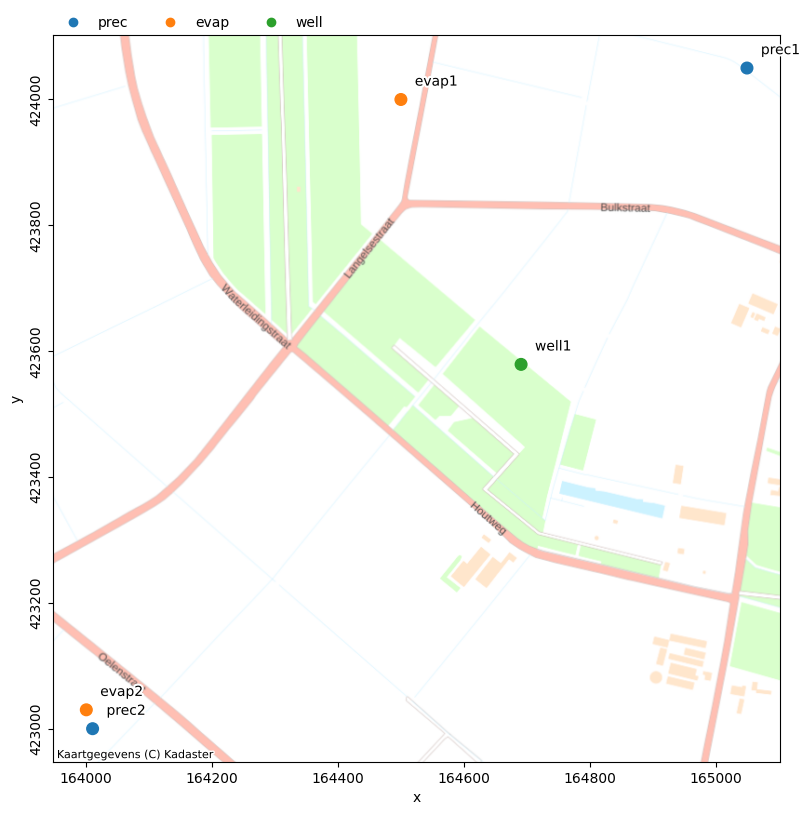

In [7]:
# plot all stresses locations
ax2 = pstore.maps.stresses(names=["prec1", "evap1", "well1", "prec2", "evap2"])
pstore.maps.add_background_map(ax2, map_provider="nlmaps.pastel")

### [Model locations](#top)

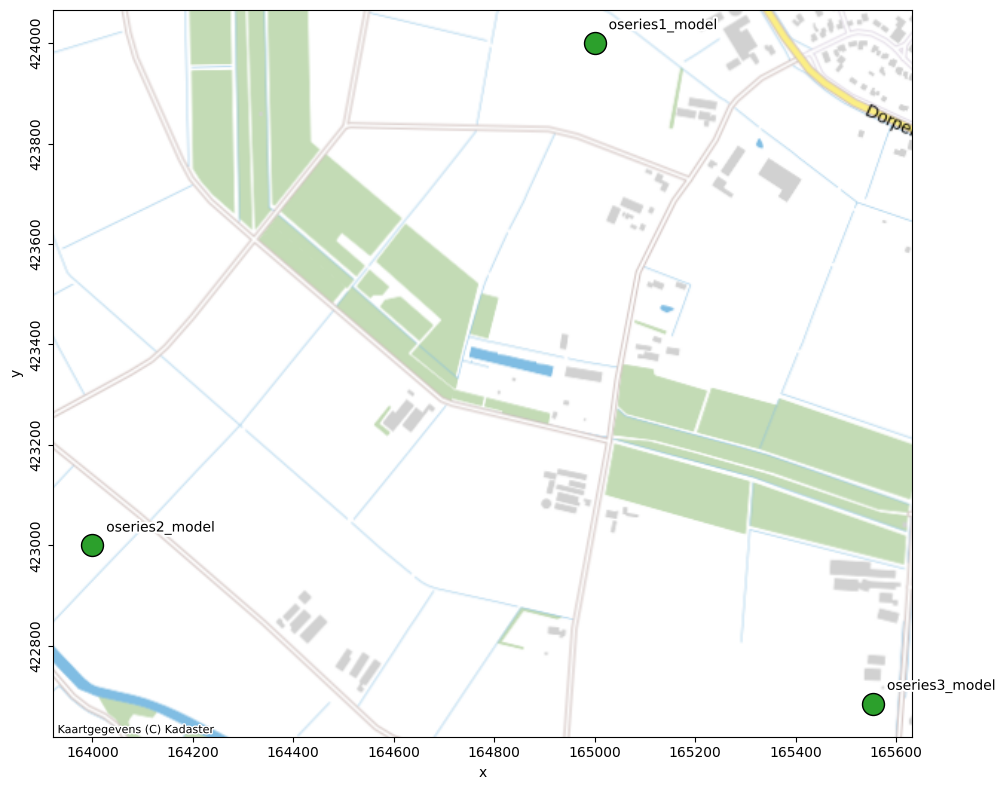

In [8]:
# create models to show
for o in pstore.oseries.index:
    ml = pstore.create_model(o, modelname=f"{o}_model", add_recharge=True)
    pstore.add_model(ml, overwrite=True)

# plot model location
ax3 = pstore.maps.models(color="C2", s=250, edgecolor="k")
pstore.maps.add_background_map(ax3, map_provider="nlmaps.standaard")

### [Model statistics](#top)

Get model statistics:   0%|          | 0/3 [00:00<?, ?it/s]

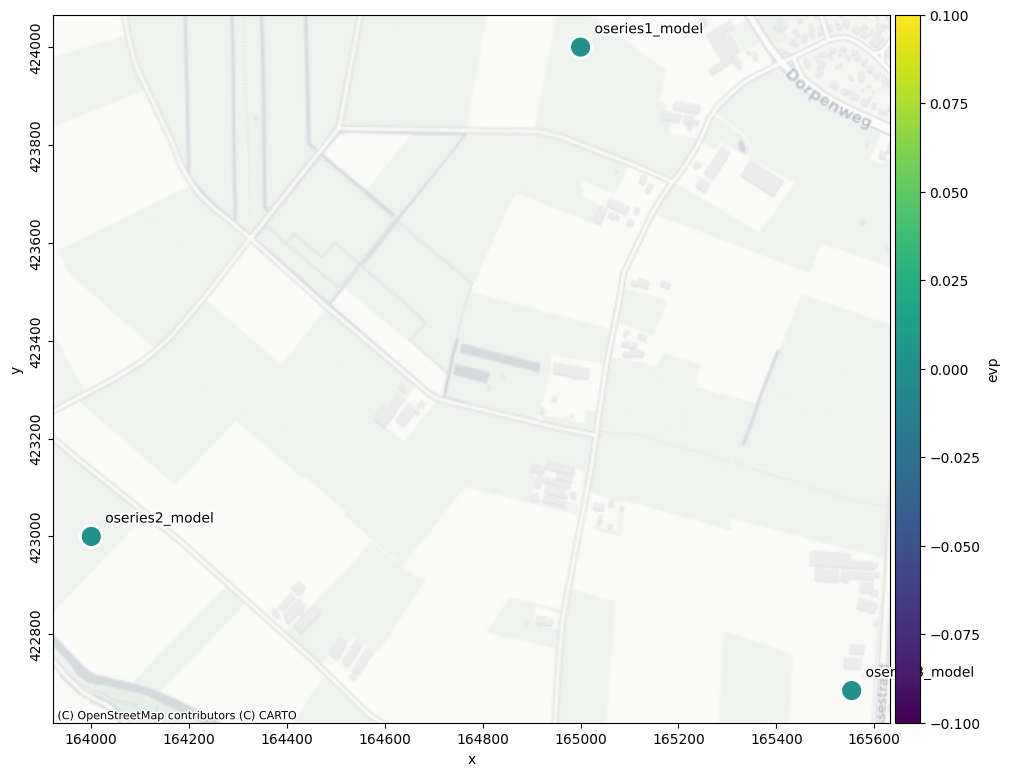

In [9]:
# plot model evp on map
ax4 = pstore.maps.modelstat("evp", s=250, edgecolors="w", linewidths=2)
pstore.maps.add_background_map(ax4, map_provider="CartoDB.Positron")

### [A single model and its time series](#top)

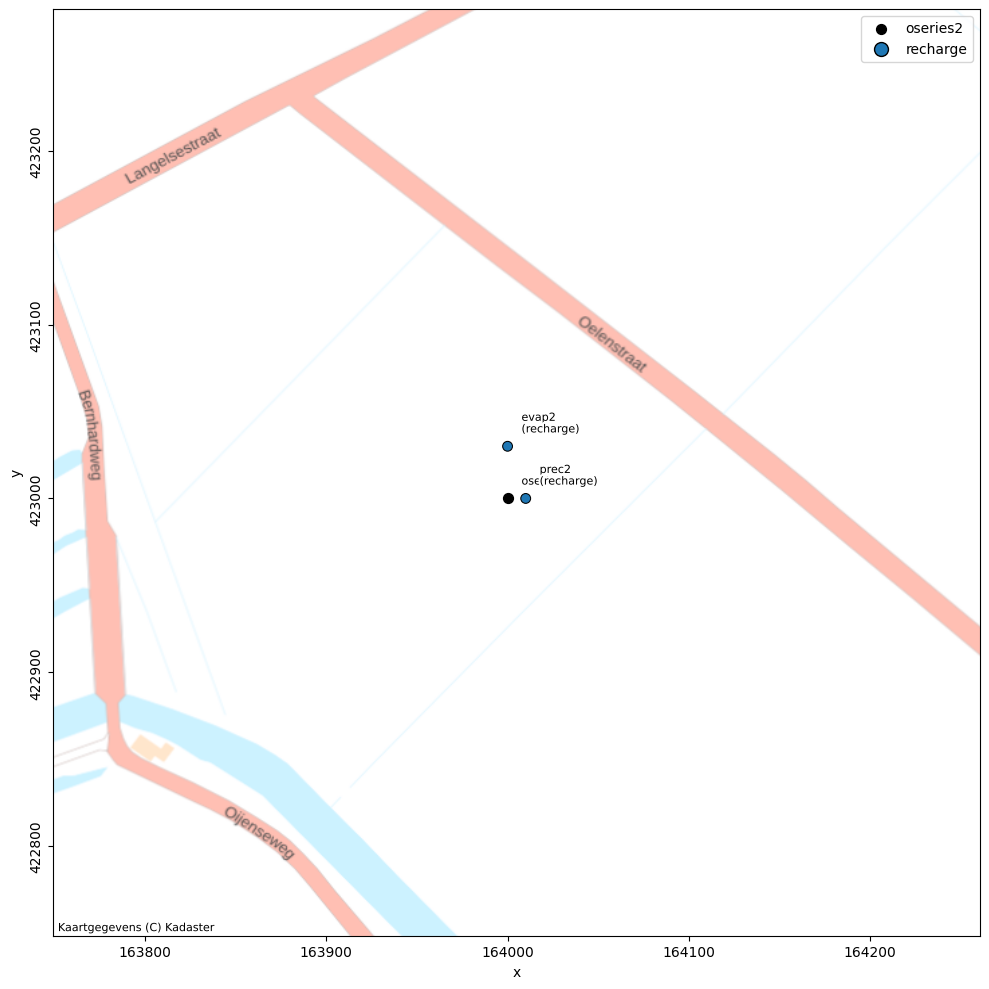

In [10]:
# plot one model, oseries and stresses
ax5 = pstore.maps.model("oseries2_model", metadata_source="store", offset=250)
pstore.maps.add_background_map(ax5, map_provider="nlmaps.pastel")

<hr>

## [Plots](#top)

A PastaStore also has a `.plots` attribute that exposes methods for plotting time series or an overview of data availability. The examples below run through the different methods and how they work.

### [Plot oseries](#top)

Get oseries:   0%|          | 0/3 [00:00<?, ?it/s]

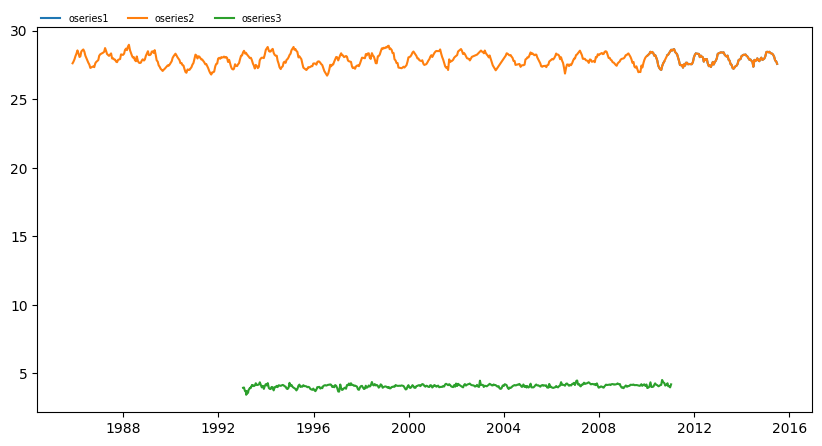

In [11]:
# plot oseries
ax6 = pstore.plots.oseries()

### [Plot stresses](#top)

When plotting stresses you can pass the `kind` argument to select only stresses of a particular kind. The `split` keyword argument allows you to plot each stress in a separate axis. Note that if there are more than 20 stresses, split is no longer supported. 

Also, you can silence the progressbar by passing `progressbar=False`.

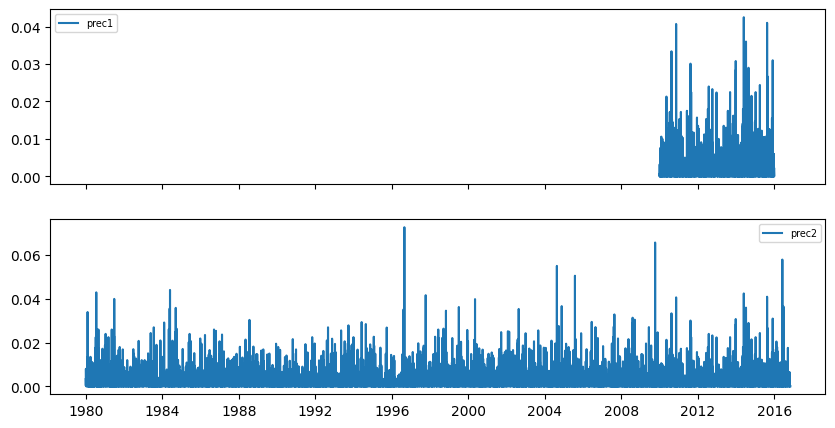

In [12]:
# plot well stresses on separate axes
ax7 = pstore.plots.stresses(kind="prec", split=True, progressbar=False)

### Data availability

Plotting data availability shows time period for which data is available and also the observation timestep. Below are three examples for oseries, all stresses, and on;y the evaporation stresses. The `set_yticks` keyword determines whether the names of the time series are used as yticks. This generally works fine if the number of time series isn't too large, but for large datasets, setting it to False is recommended.

Get oseries:   0%|          | 0/3 [00:00<?, ?it/s]

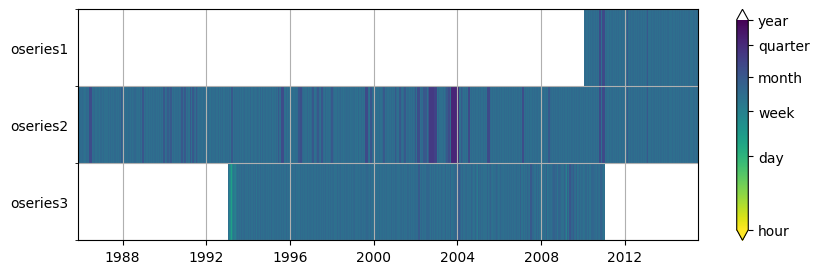

In [13]:
# plot data availability for oseries
ax8 = pstore.plots.data_availability("oseries", set_yticks=True, figsize=(10, 3))

Get stresses:   0%|          | 0/8 [00:00<?, ?it/s]

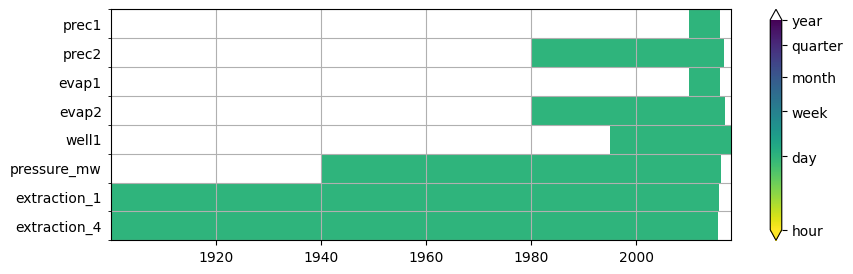

In [14]:
# plot data availability for all stresses
ax9 = pstore.plots.data_availability("stresses", set_yticks=True, figsize=(10, 3))

Get stresses:   0%|          | 0/2 [00:00<?, ?it/s]

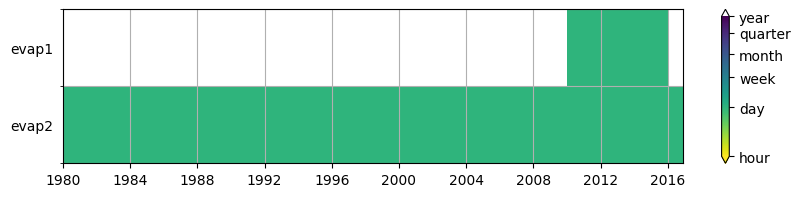

In [15]:
# plot data availability only stresses with kind="well"
ax10 = pstore.plots.data_availability(
    "stresses", kind="evap", set_yticks=True, figsize=(10, 2)
)